<a href="https://colab.research.google.com/github/lakatosgabor/ogyei_dataset_info/blob/main/ogyei_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

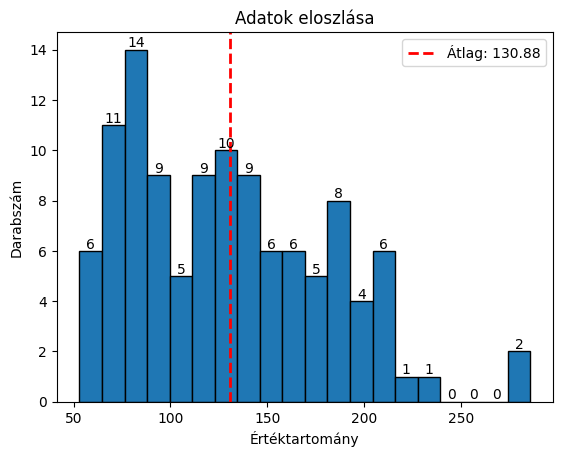

In [45]:
import csv
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Fájl elérési útja
file_path = '/content/drive/MyDrive/Colab Notebooks/ogyei/full_sentence_csv_prob.csv'
def remove_accents(input_string):
    normalized_string = unicodedata.normalize('NFD', input_string)
    stripped_string = ''.join(c for c in normalized_string if unicodedata.category(c) != 'Mn')
    return stripped_string

# CSV fájl beolvasása és tartalmának kiírása
with open(file_path, 'r', encoding='utf-8') as file:
    # CSV fájl olvasása, a "," karakterrel elválasztva
    csv_reader = csv.reader(file, delimiter='"')

    string_len = []
    counter = 0
    # Sorok beolvasása és kiíratása
    for row in csv_reader:
      counter += 1
      filename = remove_accents(row[0].replace("\t", "")).replace(",", "").replace(" ", "_").replace("-", "_").replace("/", "_") + ".jpg"
      #print(filename)

      desc = row[1].replace("\t", "").replace(":", "")
      #print(desc)

      #print("\n")

      string_len.append(len(desc))

# Hisztogram kirajzolása
n, bins, patches = plt.hist(string_len, bins=20, edgecolor='black')
plt.title('Adatok eloszlása')
plt.xlabel('Értéktartomány')
plt.ylabel('Darabszám')

# Értékek kiírása az oszlopokra
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 0.1, str(int(n[i])), ha='center')

# Átlag kiszámítása
average_value = np.mean(string_len)

# Egyenes rajzolása az átlaghoz
plt.axvline(x=average_value, color='red', linestyle='dashed', linewidth=2, label=f'Átlag: {average_value:.2f}')
plt.legend()

plt.show()

